# Independent Component Analysis

Blind source separation using FastICA.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA, PCA
from scipy import signal

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
np.random.seed(42)

---
## Generate Mixed Signals

In [2]:
# Create source signals
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Source 1: Sine wave
s1 = np.sin(2 * time)

# Source 2: Square wave
s2 = signal.square(2 * np.pi * time, duty=0.5)

# Source 3: Sawtooth wave
s3 = signal.sawtooth(2 * np.pi * time)

# Stack sources
S = np.c_[s1, s2, s3]

# Add noise
S += 0.2 * np.random.normal(size=S.shape)

# Standardize
S = S / S.std(axis=0)

print(f'Source signals shape: {S.shape}')
print(f'Number of sources: {S.shape[1]}')

Source signals shape: (2000, 3)
Number of sources: 3


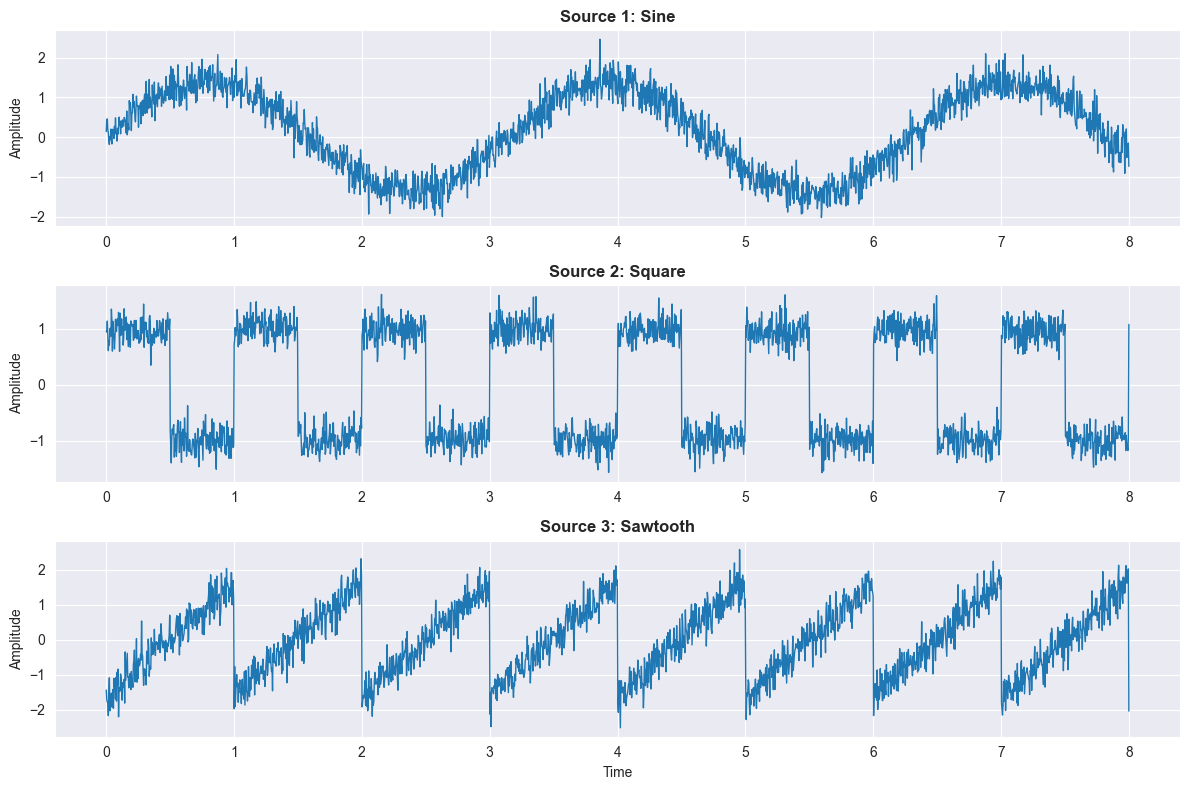

In [3]:
# Plot source signals
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
sources = ['Sine', 'Square', 'Sawtooth']

for i in range(3):
    axes[i].plot(time, S[:, i], linewidth=1)
    axes[i].set_title(f'Source {i+1}: {sources[i]}', fontweight='bold')
    axes[i].set_ylabel('Amplitude')
    if i == 2:
        axes[i].set_xlabel('Time')

plt.tight_layout()
plt.show()

---
## Create Mixture

In [4]:
# Create random mixing matrix
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])

# Mix the signals
X = S.dot(A.T)

print('Mixing matrix A:')
print(A)
print(f'\nMixed signals shape: {X.shape}')

Mixing matrix A:
[[1.  1.  1. ]
 [0.5 2.  1. ]
 [1.5 1.  2. ]]

Mixed signals shape: (2000, 3)


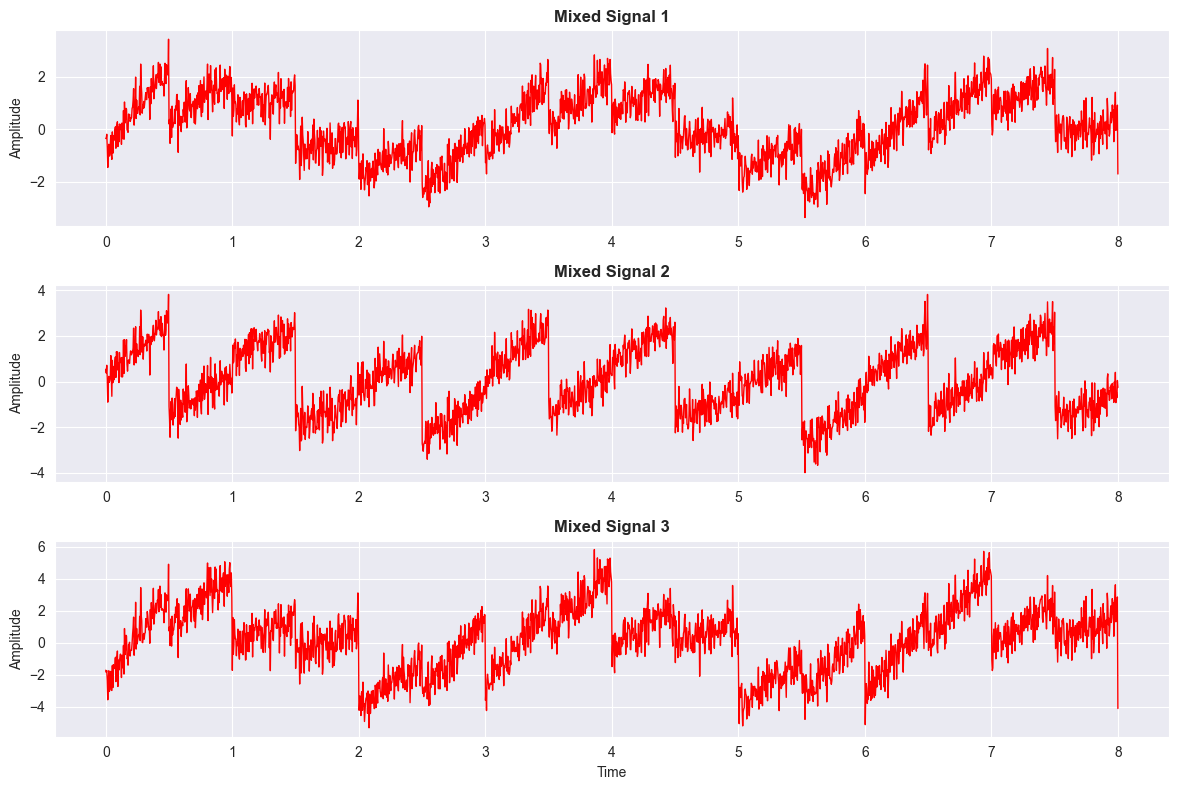

Mixed signals combine all three sources


In [5]:
# Plot mixed signals
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

for i in range(3):
    axes[i].plot(time, X[:, i], linewidth=1, color='red')
    axes[i].set_title(f'Mixed Signal {i+1}', fontweight='bold')
    axes[i].set_ylabel('Amplitude')
    if i == 2:
        axes[i].set_xlabel('Time')

plt.tight_layout()
plt.show()

print('Mixed signals combine all three sources')

---
## ICA: Recover Sources

In [6]:
# Apply FastICA
ica = FastICA(n_components=3, random_state=42, max_iter=1000)
S_ica = ica.fit_transform(X)

print('='*60)
print('FASTICA BLIND SOURCE SEPARATION')
print('='*60)
print(f'Converged: {ica.n_iter_ < 1000}')
print(f'Iterations: {ica.n_iter_}')
print(f'\nUnmixing matrix W shape: {ica.components_.shape}')

FASTICA BLIND SOURCE SEPARATION
Converged: True
Iterations: 5

Unmixing matrix W shape: (3, 3)


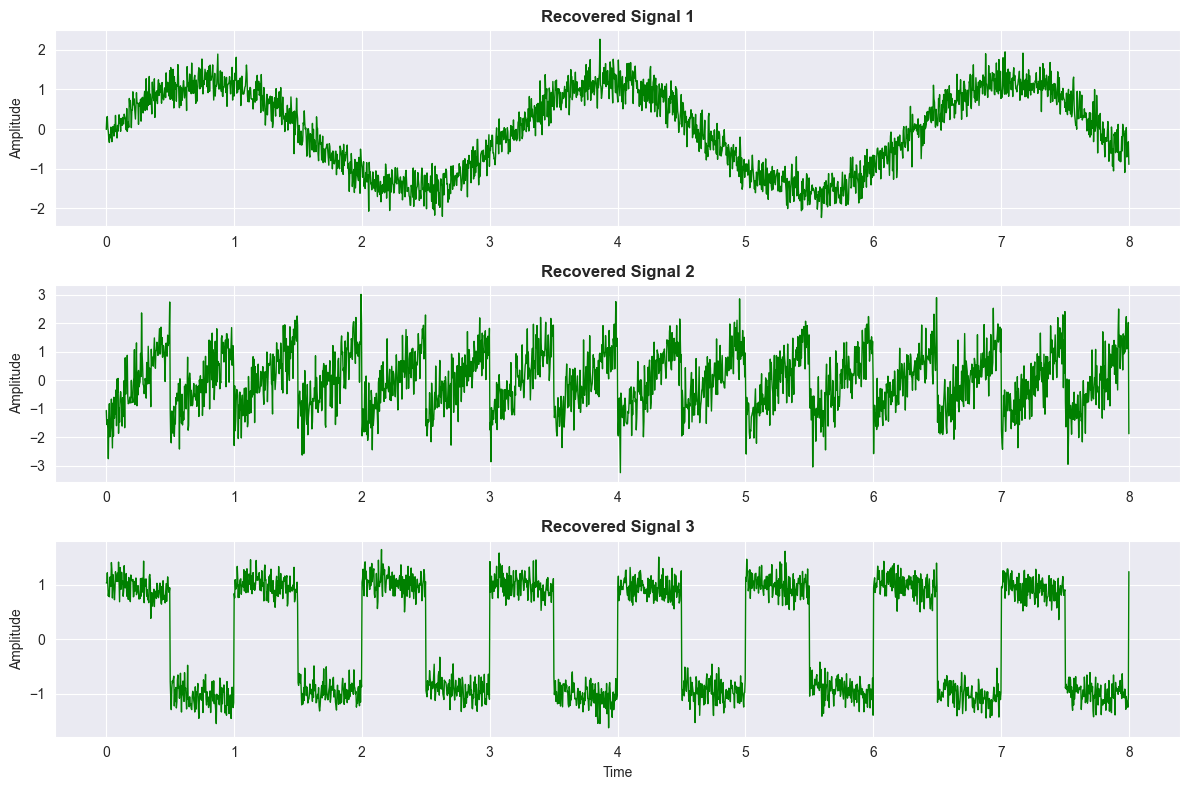

ICA successfully separated the mixed signals


In [7]:
# Plot recovered signals
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

for i in range(3):
    axes[i].plot(time, S_ica[:, i], linewidth=1, color='green')
    axes[i].set_title(f'Recovered Signal {i+1}', fontweight='bold')
    axes[i].set_ylabel('Amplitude')
    if i == 2:
        axes[i].set_xlabel('Time')

plt.tight_layout()
plt.show()

print('ICA successfully separated the mixed signals')

---
## Compare: Original vs Recovered

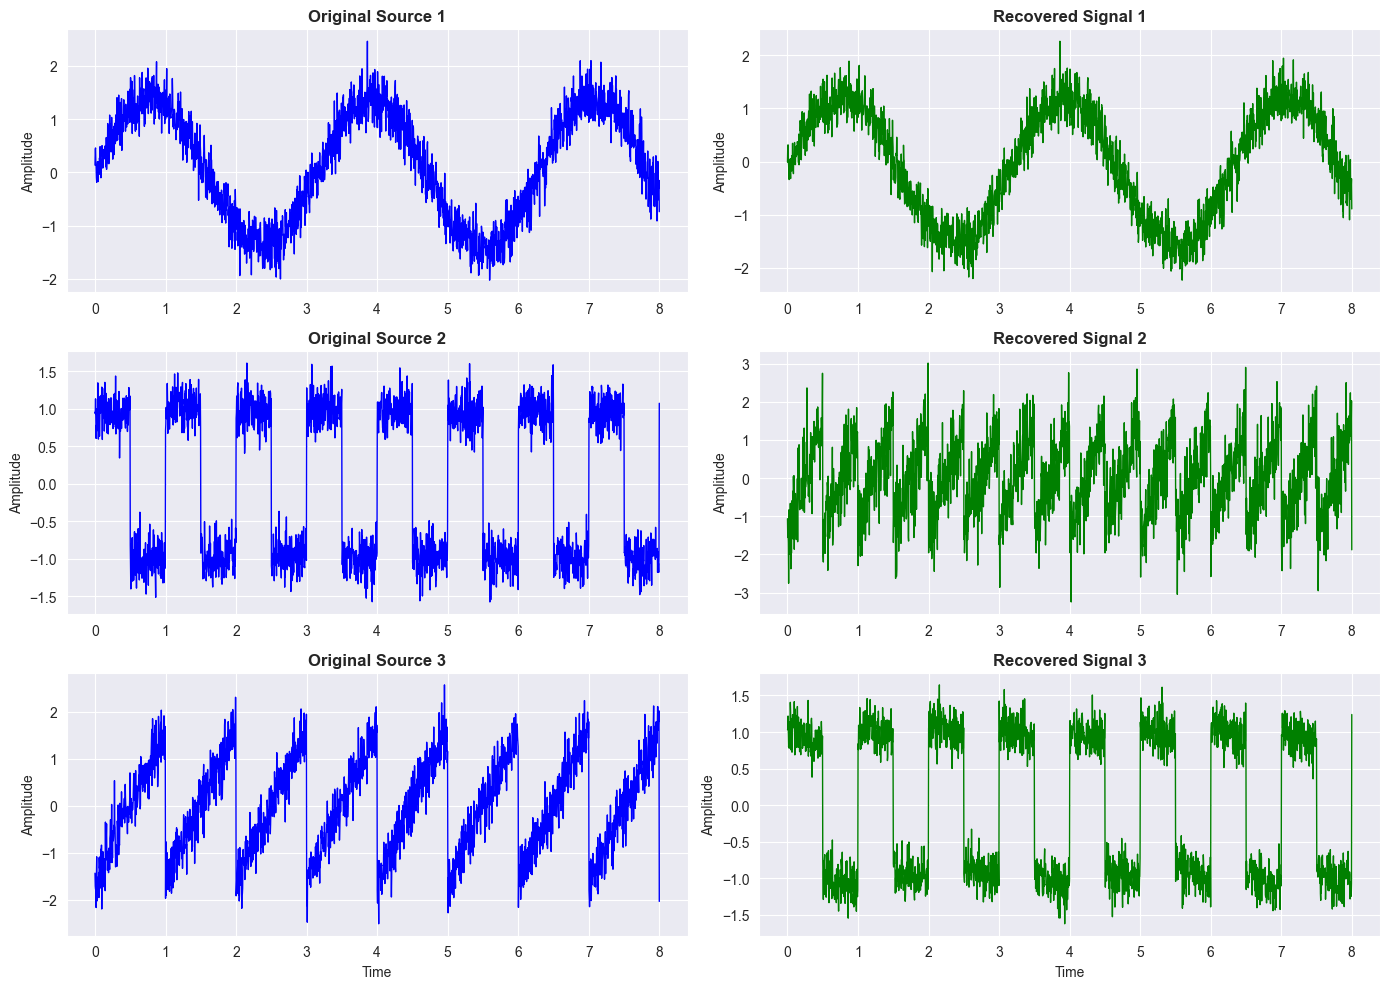

Note: Order and sign of recovered signals may differ from originals
This is inherent to ICA - permutation and scaling ambiguity


In [8]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

for i in range(3):
    # Original sources
    axes[i, 0].plot(time, S[:, i], linewidth=1, color='blue')
    axes[i, 0].set_title(f'Original Source {i+1}', fontweight='bold')
    axes[i, 0].set_ylabel('Amplitude')
    
    # Recovered sources (may be in different order/sign)
    axes[i, 1].plot(time, S_ica[:, i], linewidth=1, color='green')
    axes[i, 1].set_title(f'Recovered Signal {i+1}', fontweight='bold')
    axes[i, 1].set_ylabel('Amplitude')
    
    if i == 2:
        axes[i, 0].set_xlabel('Time')
        axes[i, 1].set_xlabel('Time')

plt.tight_layout()
plt.show()

print('Note: Order and sign of recovered signals may differ from originals')
print('This is inherent to ICA - permutation and scaling ambiguity')

---
## PCA vs ICA Comparison

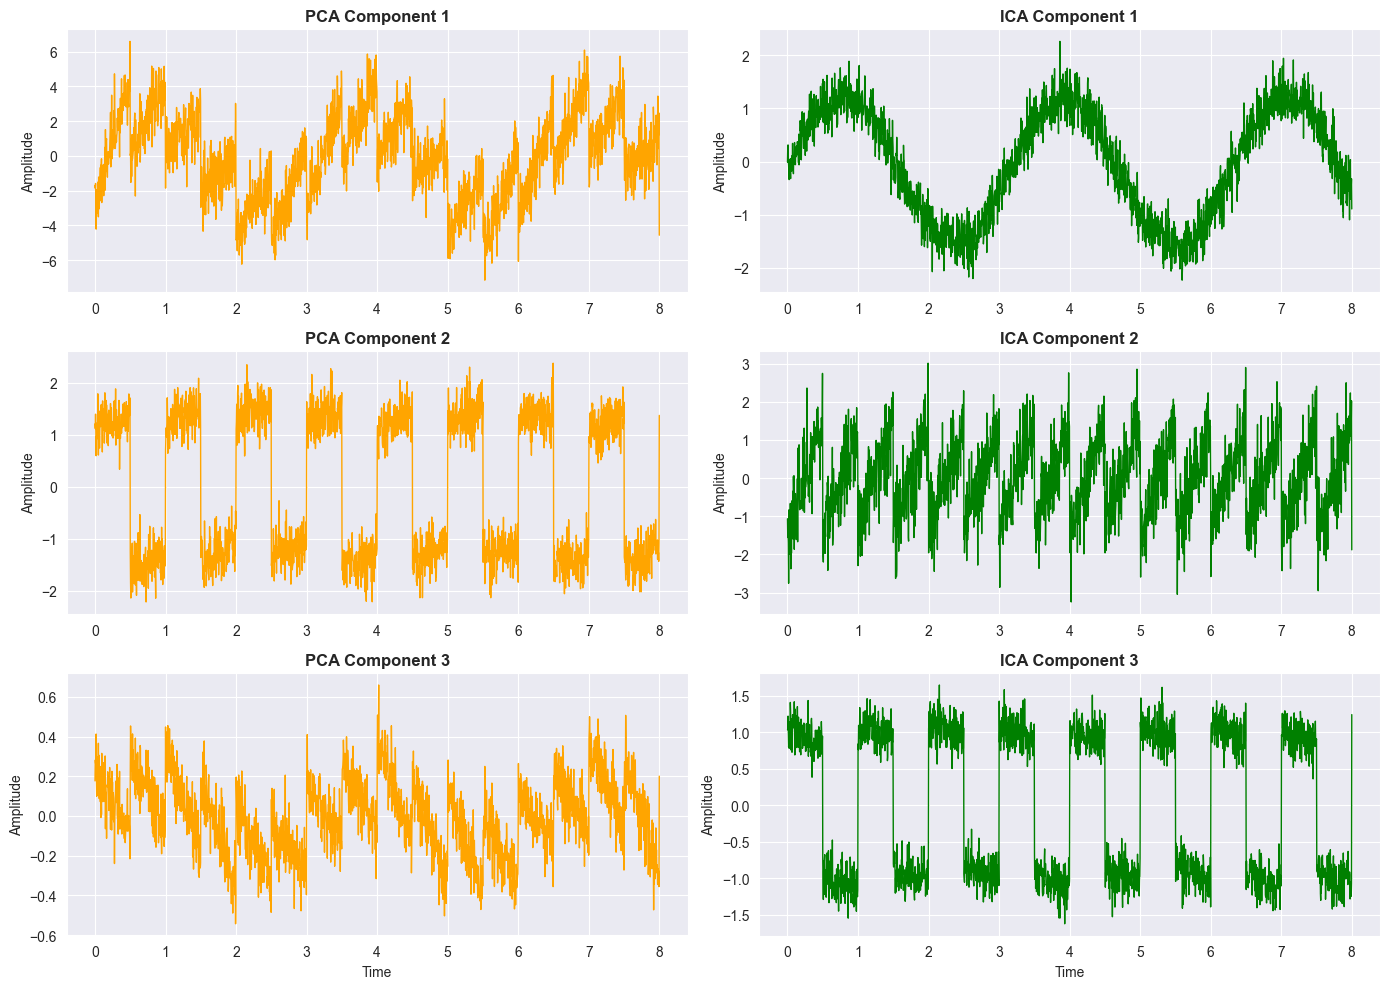

PCA: Finds directions of maximum variance (still mixed)
ICA: Finds statistically independent sources (separated)


In [9]:
# Apply PCA
pca = PCA(n_components=3)
S_pca = pca.fit_transform(X)

# Plot comparison
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

for i in range(3):
    # PCA components
    axes[i, 0].plot(time, S_pca[:, i], linewidth=1, color='orange')
    axes[i, 0].set_title(f'PCA Component {i+1}', fontweight='bold')
    axes[i, 0].set_ylabel('Amplitude')
    
    # ICA components
    axes[i, 1].plot(time, S_ica[:, i], linewidth=1, color='green')
    axes[i, 1].set_title(f'ICA Component {i+1}', fontweight='bold')
    axes[i, 1].set_ylabel('Amplitude')
    
    if i == 2:
        axes[i, 0].set_xlabel('Time')
        axes[i, 1].set_xlabel('Time')

plt.tight_layout()
plt.show()

print('PCA: Finds directions of maximum variance (still mixed)')
print('ICA: Finds statistically independent sources (separated)')

---
## Independence Check

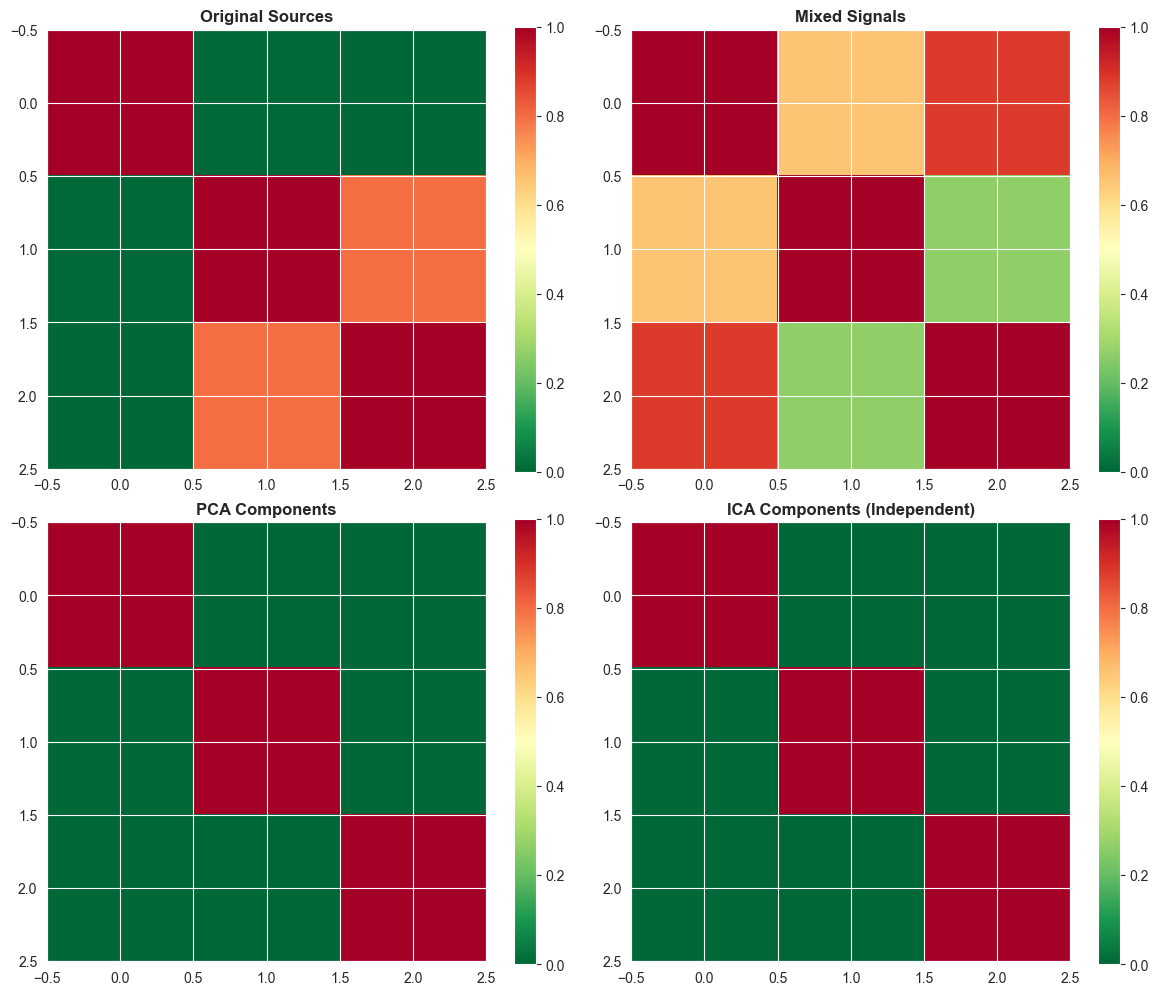

Darker colors = less correlation (more independent)
ICA achieves near-diagonal correlation matrix (independence)


In [10]:
# Compute correlation matrices
corr_original = np.corrcoef(S.T)
corr_mixed = np.corrcoef(X.T)
corr_ica = np.corrcoef(S_ica.T)
corr_pca = np.corrcoef(S_pca.T)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original
im1 = axes[0, 0].imshow(np.abs(corr_original), cmap='RdYlGn_r', vmin=0, vmax=1)
axes[0, 0].set_title('Original Sources', fontweight='bold')
plt.colorbar(im1, ax=axes[0, 0])

# Mixed
im2 = axes[0, 1].imshow(np.abs(corr_mixed), cmap='RdYlGn_r', vmin=0, vmax=1)
axes[0, 1].set_title('Mixed Signals', fontweight='bold')
plt.colorbar(im2, ax=axes[0, 1])

# PCA
im3 = axes[1, 0].imshow(np.abs(corr_pca), cmap='RdYlGn_r', vmin=0, vmax=1)
axes[1, 0].set_title('PCA Components', fontweight='bold')
plt.colorbar(im3, ax=axes[1, 0])

# ICA
im4 = axes[1, 1].imshow(np.abs(corr_ica), cmap='RdYlGn_r', vmin=0, vmax=1)
axes[1, 1].set_title('ICA Components (Independent)', fontweight='bold')
plt.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()

print('Darker colors = less correlation (more independent)')
print('ICA achieves near-diagonal correlation matrix (independence)')

---
## Summary

**Key Points:**
- ICA separates mixed signals into independent components
- FastICA algorithm uses non-Gaussianity for separation
- Recovers sources up to permutation and scaling
- PCA finds uncorrelated components, ICA finds independent
- Critical for blind source separation problems

**Key Point:** "ICA finds statistically independent components by maximizing non-Gaussianity. Unlike PCA which finds uncorrelated components, ICA achieves true statistical independence, making it ideal for blind source separation like cocktail party problem."